In [6]:
# Import required libraries for this section

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import math
import cv2                     # OpenCV library for computer vision
from PIL import Image
import time 

In [7]:
#General function Haar detection

def HaarDetection(img, feature = 'face', face_scale_factor = 1.25, face_min_neighbours = 6, eyes_scale_factor = 1.05, eyes_min_neighbours = 5, print_count = 'No', pic = 'static'):
    
    #Convert the image to gray scale image
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    #Copy the image to a new variable
    image_with_detections = np.copy(img)
    
    #Detect faces and eyes using Haar cascade classifier  
    face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(gray, face_scale_factor, face_min_neighbours)
    if len(faces) > 0:
        if feature == 'face' or feature == 'all':
            for (a,b,c,d) in faces:
                cv2.rectangle(image_with_detections, (a,b), (a+c,b+d), (255,0,0), 3)
                
        if feature == 'eyes' or feature == 'all':
            eyes_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_eye.xml')        
            for (x,y,w,h) in faces:
                eyes = eyes_cascade.detectMultiScale(gray[y:y+h,x:x+w], eyes_scale_factor, eyes_min_neighbours)
                for (a,b,c,d) in eyes:
                    cv2.rectangle(image_with_detections[y:y+h,x:x+w], (a,b), (a+c,b+d), (0,255,0), 3)
    

    # Print the number of faces detected in the image
        if print_count == 'Yes':
            if feature == 'face':
                print('Number of faces detected:', len(faces))
            elif feature == 'eyes':
                print('Number of eyes detected:', len(eyes))
            elif feature == 'all':
                print('Number of faces detected:', len(faces))
                print('Number of eyes detected:', len(eyes))


# Get the bounding box for each detected face
    
        if pic == 'static':
            fig = plt.figure(figsize = (6,6))
            ax1 = fig.add_subplot(111)
            ax1.set_xticks([])
            ax1.set_yticks([])
            if feature == 'face':
                ax1.set_title('Image with Face Detection')
            elif feature == 'eyes':
                ax1.set_title('Image with Eye Detection')
            elif feature == 'all':
                ax1.set_title('Image with Face and Eye Detection')
            ax1.imshow(image_with_detections)
          
                        
           
    else:
        if print_count == 'Yes':
            print('No faces detected')
            
    if pic == 'live':
        cv2.imshow("face detection activated", image_with_detections)
        key = cv2.waitKey(20)
        if key > 0: # Exit by pressing any key
            # Destroy windows 
            cv2.destroyAllWindows()
            
            # Make sure window closes on OSx
            for i in range (1,5):
                cv2.waitKey(1)
            return -1

Number of faces detected: 2
Number of eyes detected: 2


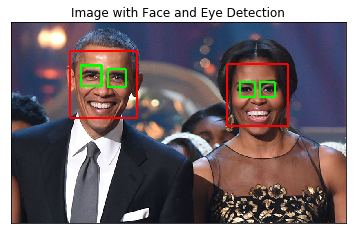

In [23]:
image = cv2.imread('images/obamas-t.jpg')

# Convert the image to RGB colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image = HaarDetection(image, 'all',face_scale_factor = 1.25, face_min_neighbours = 5, eyes_min_neighbours = 15, print_count = 'Yes')


In [12]:
### Add face and eye detection to this laptop camera function 
# Make sure to draw out all faces/eyes found in each frame on the shown video feed

import cv2
import time 
import numpy as np

# wrapper function for face/eye detection with your laptop camera
def laptop_camera_go():
    # Create instance of video capturer
    cv2.namedWindow("face detection activated")
    vc = cv2.VideoCapture(0)

    # Try to get the first frame
    if vc.isOpened(): 
        rval, frame = vc.read()
    else:
        rval = False
    
    # Keep the video stream open
    while rval:
        # Plot the image from camera with all the face and eye detections marked
        key = HaarDetection(frame, 'all', pic = 'live')
        
        if key == -1:
            return
        # Read next frame
        time.sleep(0.05)             # control framerate for computation - default 20 frames per sec
        rval, frame = vc.read()    

In [10]:
# Call the laptop camera face/eye detector function above
laptop_camera_go()